## Obenhaus et al. - Fig. 2

Example path/event plots and spatial tuning maps 
- panels D, E, F, G

In [2]:
# Set up basics
import sys, os
import numpy as np 
import pandas as pd
import datajoint as dj
from IPython.display import display

In [3]:
sys.path.append('..')
from dj_schemas.utils import *

Connecting horsto@kavlidatajoint02.it.ntnu.no:3306


In [4]:
# Make plots pretty 
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(style='white')
%config InlineBackend.figure_format = 'retina'

In [5]:
# To prevent bug in figure export as pdf: 
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
from mpl_toolkits.axes_grid1 import make_axes_locatable
def now():
    # New time every minute
    return datetime.strftime(datetime.now(),'%d_%m_%Y %H_%M')

In [6]:
# Standard figure export directory:
figure_dir = '../YOUR_EXPORT_DIRECTORY'

### Filter sessions / cells

In [7]:
animal_name = ['88592']
filtered_sessions = get_filtered_sessions(animal_name, filter_occupancy=True)
filtered_cells    = get_filtered_cells(filtered_sessions)

['88592'] 
Session type: Open Field
Cutoff occupancy [seconds]:         900
Explor std cutoff:                < 6
Eplor ratio cutoff:               > 0.7

10 unfiltered sessions of type "Open Field"
 9 filtered sessions
Using RoisCorr and compression_ratio cutoff
1741 cells found for {'88592'} over 9 sessions


In [8]:
from dj_plotter import dj_plotter

### Grid cells 

In [9]:
grid_ratemaps = Session * Ratemap * GridScore & filtered_cells & cell_parameter_dict
grid_ratemaps = grid_ratemaps & 'gridscore > .9'

In [10]:
keys = np.load('fig 2 grid keys.npy', allow_pickle=True)
print(len(keys))

3


Drawing ratemaps:   0%|          | 0/2 [00:00<?, ?it/s]

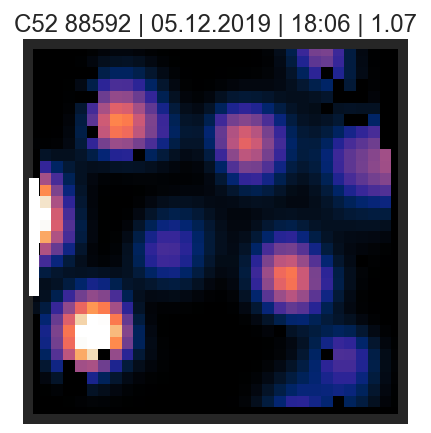

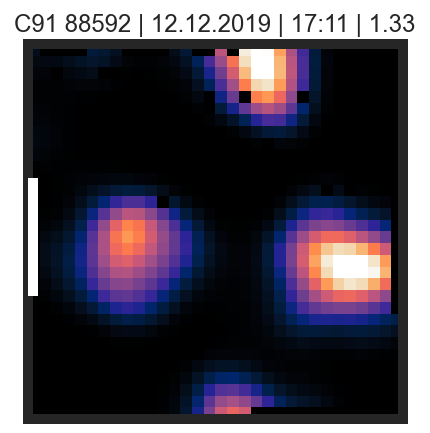

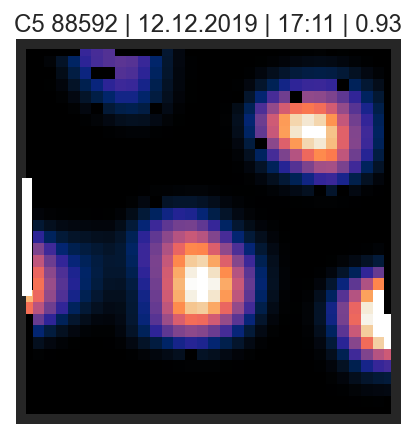

<Figure size 1440x1440 with 0 Axes>

In [11]:
cue_card_pos = 'west'
plot = dj_plotter(grid_ratemaps, keys, total=3, plots_per_view=1)
fig = plot.ratemaps(display_score='gridscore', hash_or_animal='animal', 
                    cmap='cmr.torch', cue_card_pos='west', display_title=True)

Drawing autocorrelations:   0%|          | 0/2 [00:00<?, ?it/s]

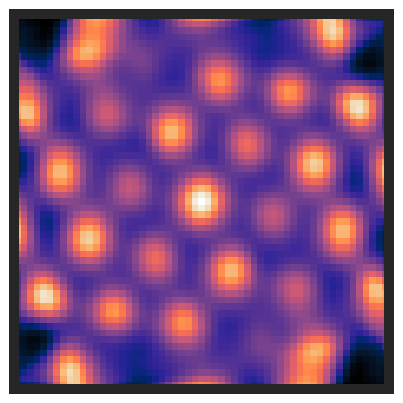

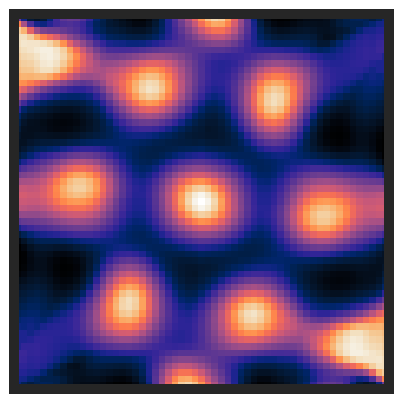

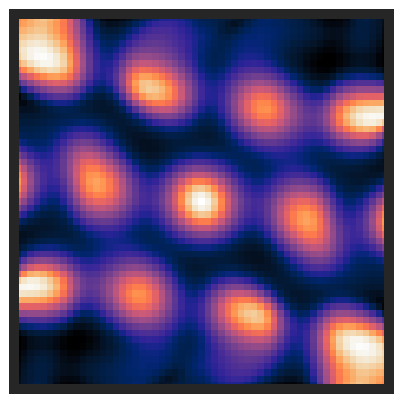

<Figure size 1440x1440 with 0 Axes>

In [12]:
plot.autocorr(display_score='gridscore', hash_or_animal='hash',cmap='cmr.torch', axes_lw=5, display_title=False)

In [13]:
paths_spikes = Session * Tracking.OpenField * SignalTracking & cell_parameter_dict & keys

Drawing path-spike plots:   0%|          | 0/2 [00:00<?, ?it/s]

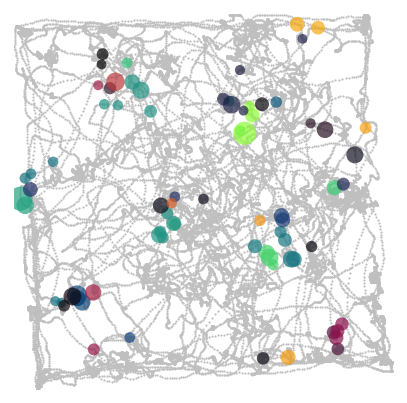

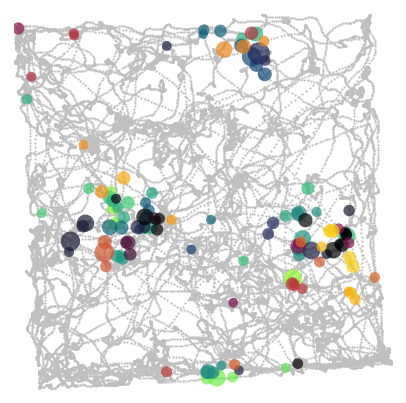

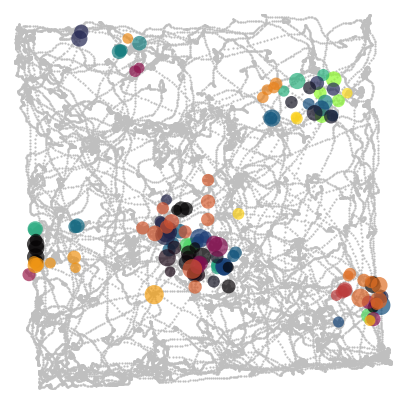

<Figure size 1440x1440 with 0 Axes>

In [14]:
plot = dj_plotter(paths_spikes, keys, total=3, plots_per_view=1)
plot.path_spike(draw_time=True, cmap='cmr.wildfire',  display_title=False) 

### HD cells

In [15]:
paths_spikes_hd = Session * Tracking.OpenField * SignalTracking * AngularRate.Stats & cell_parameter_dict & FilteredCells.proj(data='dataset_name')

In [16]:
keys =  np.load('fig 2 hd keys.npy', allow_pickle=True)
keys_ = []
for key in keys:
    if key['cell_id'] not in [32,111,0]:
        continue
    keys_.append(key)
keys = keys_

Drawing path-spike plots:   0%|          | 0/2 [00:00<?, ?it/s]

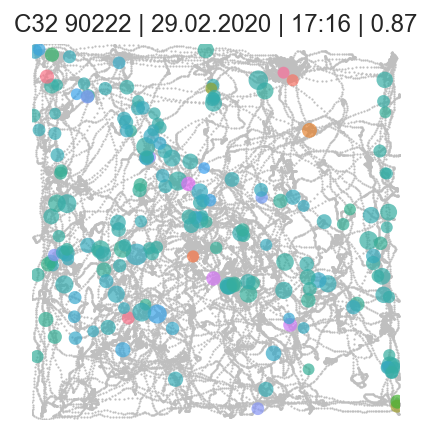

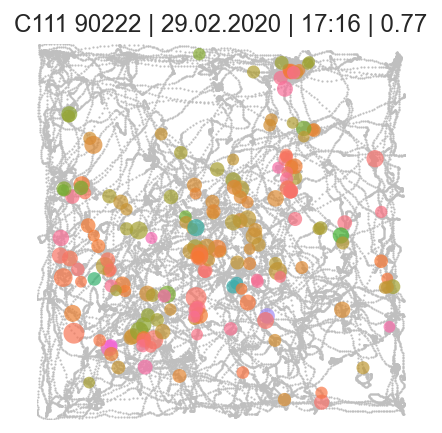

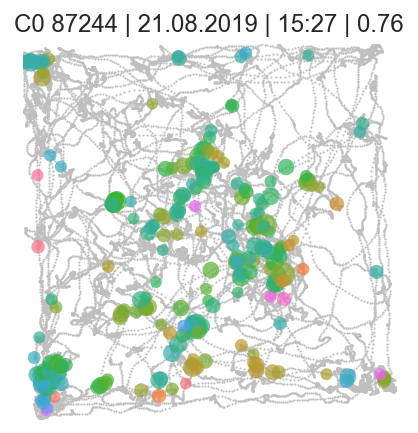

<Figure size 1440x1440 with 0 Axes>

In [17]:
plot = dj_plotter(paths_spikes_hd, keys, total=3, plots_per_view=1)
plot.path_spike(draw_hd=True, display_score='mvl', cmap='husl', display_title=True) 

In [18]:
hd_tuning = Session * AngularOccupancy * AngularRate * AngularRate.Stats * CutoffsMVL\
                & cell_parameter_dict

Drawing HD tuning:   0%|          | 0/2 [00:00<?, ?it/s]

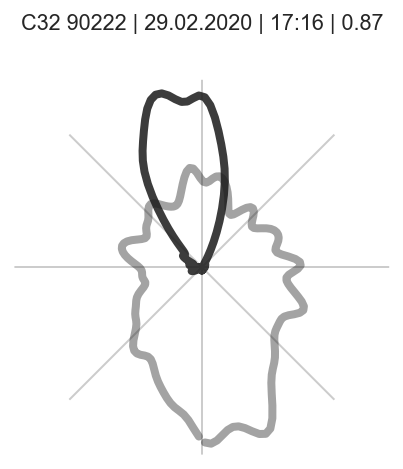

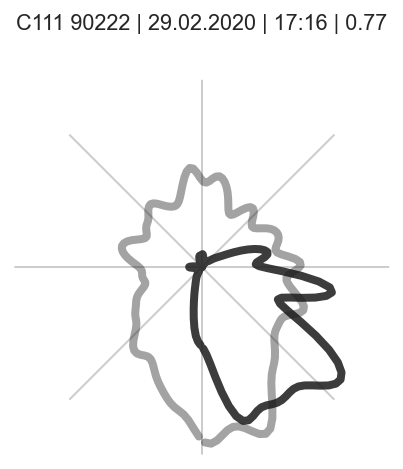

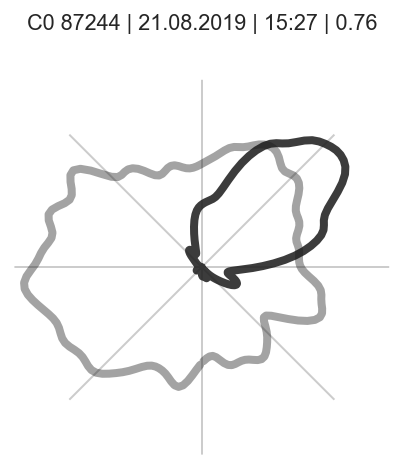

<Figure size 1440x1440 with 0 Axes>

In [19]:
plot = dj_plotter(hd_tuning, keys, font_scale=.9, total=3, plots_per_view=1)
plot.hdtuning(color_hd=False, display_score='mvl', cmap='husl', display_title=True, line_width=4)

### OVC cells 

### Border cells

In [23]:
### BVS / borderscore
borderscore_schema = dj.schema('user_horsto_borderscore')
borderscore_schema.spawn_missing_classes()

In [24]:
border_cell_keys = np.load('fig 2 border keys.npy', allow_pickle=True)

In [25]:
bvs_ratemaps = Session * Ratemap * BVScore * BorderScore \
               & cell_parameter_dict 

Drawing ratemaps:   0%|          | 0/2 [00:00<?, ?it/s]

Saving figure under ../YOUR_EXPORT_DIRECTORY
Saving figure under ../YOUR_EXPORT_DIRECTORY
Saving figure under ../YOUR_EXPORT_DIRECTORY


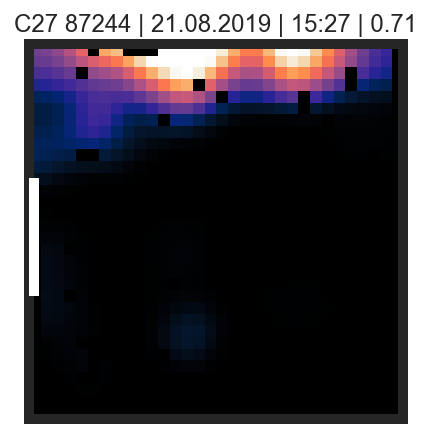

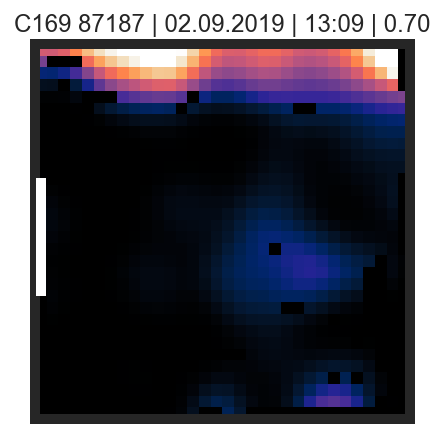

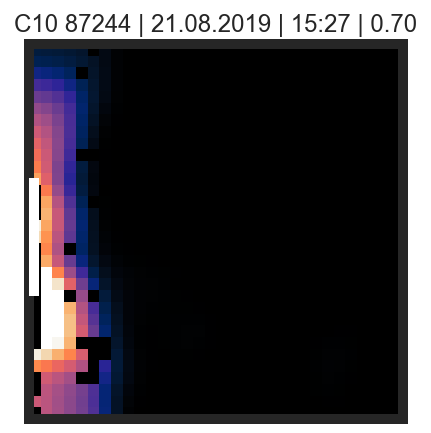

<Figure size 1440x1440 with 0 Axes>

In [26]:
cue_card_pos = 'west'
plot = dj_plotter(bvs_ratemaps, border_cell_keys, plots_per_view=1, save_path=figure_dir)
fig = plot.ratemaps(display_score='borderscore', hash_or_animal='animal', cmap='cmr.torch', cue_card_pos='west', display_title=True)

Drawing path-spike plots:   0%|          | 0/2 [00:00<?, ?it/s]

Saving figure under ../YOUR_EXPORT_DIRECTORY
Saving figure under ../YOUR_EXPORT_DIRECTORY
Saving figure under ../YOUR_EXPORT_DIRECTORY


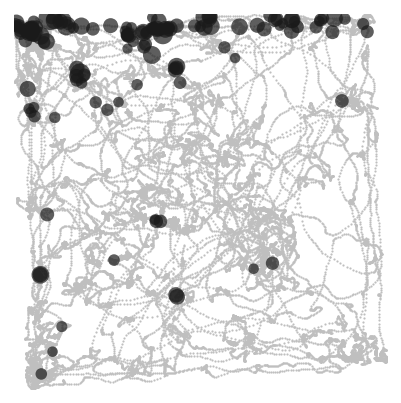

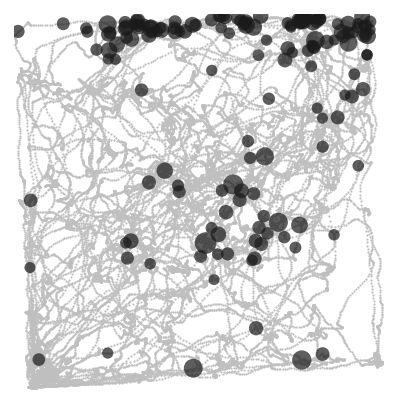

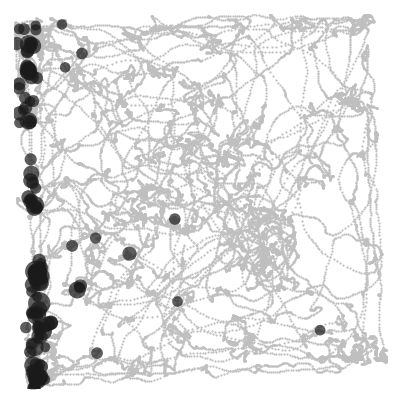

<Figure size 1440x1440 with 0 Axes>

In [27]:
paths_spikes = Session * Tracking.OpenField * SignalTracking & cell_parameter_dict & border_cell_keys
plot = dj_plotter(paths_spikes, border_cell_keys, plots_per_view=1, save_path=figure_dir, save_format='png')
plot.path_spike(display_title=False, draw_hd=False) 